                                                        CAR PRICE DATASET

> This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

> OPERATIONS PERFORMED :

    1. EXPLORATORY DATA ANALYSIS & DATA WRANGLING
    2. FEATURE ENGINEERING & ENCODING
    3. lINEAR REGRESSION

In [538]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [539]:
#reading all the dataset

ls = ['vehicle-dataset-from-cardekho/car data.csv' , 'vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv' , 'vehicle-dataset-from-cardekho/Car details v3.csv' , 'vehicle-dataset-from-cardekho/car details v4.csv']
for i in ls:
    print(pd.read_csv(i).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      434

In [540]:
#reading the dataset

df = pd.read_csv('vehicle-dataset-from-cardekho/Car details v3.csv')
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


                                        EXPLORATORY DATA ANALYSIS & DATA WRANGLING 

In [541]:
df.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [542]:
# counting all the null values in the dataset 


for i in df.columns:
    print(df[i].value_counts())
    print(i , " " , df[i].isna().sum() , end = '\n')
    print('\n')

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64
name   0


2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995   

In [543]:
#checking for missing values

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' , 'PERCENT'])

miss_values = missing_values(df)
miss_values

,TOTAL,PERCENT
torque,222,2.731299
mileage,221,2.718996
engine,221,2.718996
seats,221,2.718996
max_power,215,2.645177
name,0,0.000000
year,0,0.000000
selling_price,0,0.000000
km_driven,0,0.000000
fuel,0,0.000000


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [545]:
#dropping null values 

df.dropna(inplace = True)

In [546]:
#checking the correlation between year , selling price , km driven & seats

df[['year', 'selling_price' , 'km_driven' , 'seats']].corr()

,year,selling_price,km_driven,seats
year,1.000000,0.412302,-0.428548,-0.007923
selling_price,0.412302,1.000000,-0.222158,0.041617
km_driven,-0.428548,-0.222158,1.000000,0.227259
seats,-0.007923,0.041617,0.227259,1.000000


>> CORRELATION SUMMARY :
    
    1. The correlation between the year & selling price is 0.412302 . This positive correlation suggests that as year of car increases ,
        the selling price tends to increase . In simpler terms , newer cars generally sell for higher prices .bashrc
        
    2. The correlation between kms driven & selling price is -0.222158 . This negative correlation implies that as selling price increases , kms tend
        to decrease , thus cars with lower kms driven sell for higher prices 
        
    3 . The correlation between number of seats in a car & its selling price is 0.041617 . This suggests a weak positive relationship . in simple terms there is a slight tendency for cars with more seats to have a higher selling price , but its not strong .

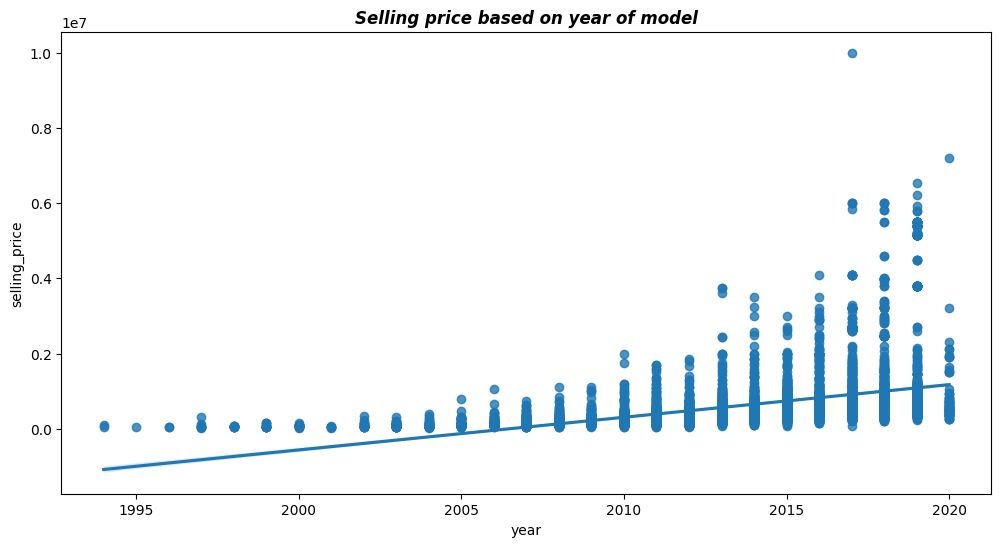

In [547]:
plt.figure(figsize = (12,6))
plt.title('Selling price based on year of model' , weight = 'bold' , style = 'italic')
sns.regplot( x = df['year'] , y = df['selling_price'])
plt.show()

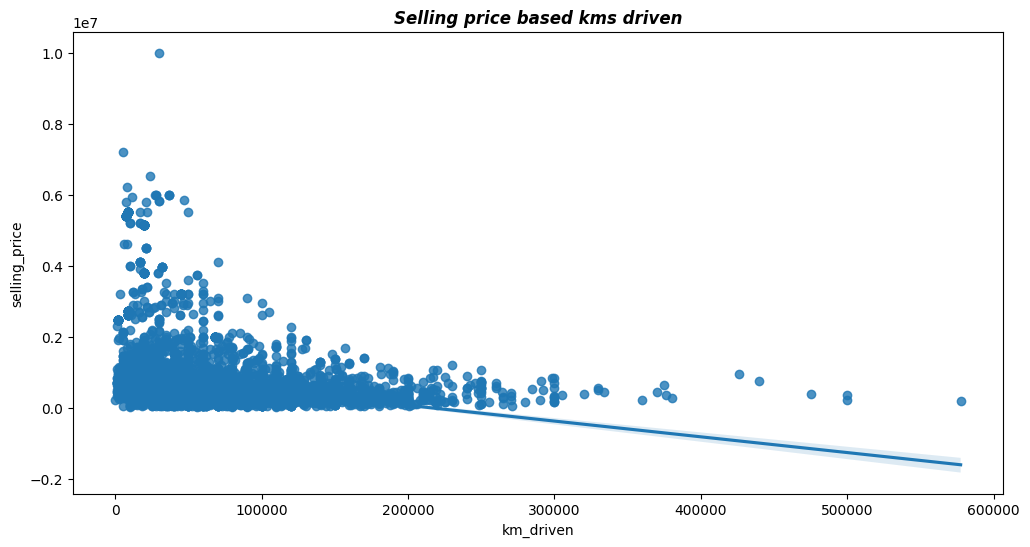

In [548]:
plt.figure(figsize = (12,6))
plt.title('Selling price based kms driven' , weight = 'bold' , style = 'italic')
df.drop(df[df['km_driven'] > 1000000].index , inplace = True)
sns.regplot(x = df['km_driven'] , y = df['selling_price'])
plt.show()

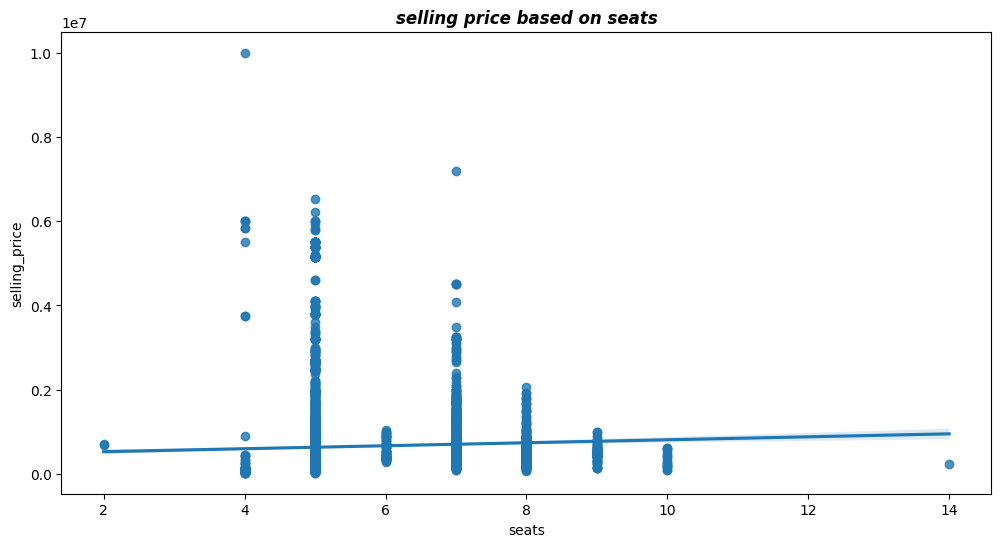

In [549]:
plt.figure(figsize = (12,6))
plt.title('selling price based on seats' , weight = 'bold' , style = 'italic')
sns.regplot(x = df['seats'] , y = df['selling_price'])
plt.show()

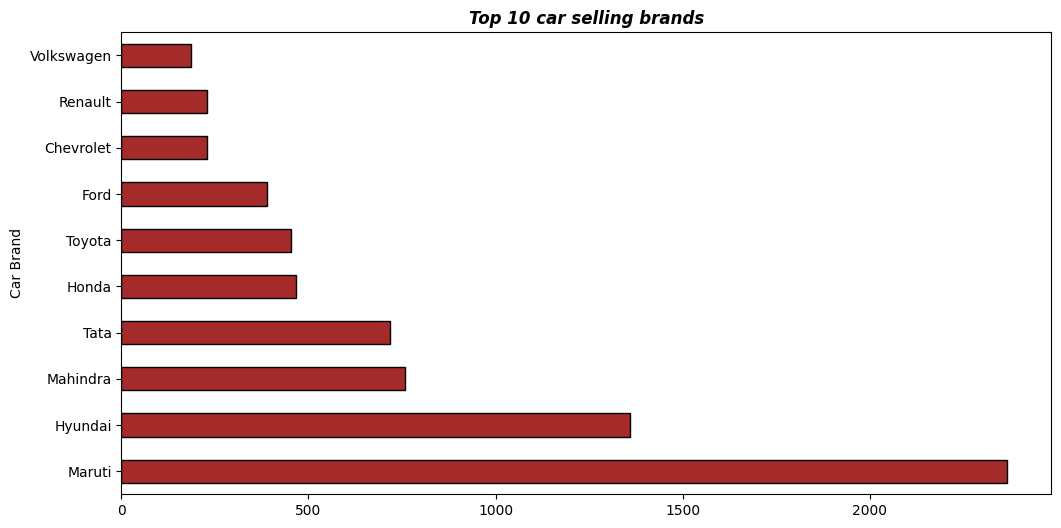

In [550]:
plt.figure(figsize = (12,6))
plt.title('Top 10 car selling brands' , weight = 'bold' , style = 'italic')
plt.xlabel('Sales')
plt.ylabel('Car Brand')
df['name'].str.split().str[0].value_counts()[:10].plot(kind = 'barh' , color = 'brown' , edgecolor = 'black')
plt.show()

                                                        FEATURE ENGINEERING

In [551]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [552]:
#fixing the data and converting it to the correct dtype

df['mileage'] = df['mileage'].str.split().str[0].astype(float)
df['engine'] = df['engine'].str.split().str[0].astype(int)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [553]:
df['year'] = df['year'].astype(float)
df['km_driven'] = df['km_driven'].astype(float)
df['selling_price'] = df['selling_price'].astype(float)
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0


>> ENCODING

In [554]:
print(df['fuel'].value_counts())

Diesel    4298
Petrol    3519
CNG         52
LPG         35
Name: fuel, dtype: int64


In [555]:
test_fuel = pd.get_dummies(df['fuel']).astype(float)
test_fuel

,CNG,Diesel,LPG,Petrol
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8123,0.0,0.0,0.0,1.0
8124,0.0,1.0,0.0,0.0
8125,0.0,1.0,0.0,0.0
8126,0.0,1.0,0.0,0.0


In [556]:
df = pd.concat([df , test_fuel] , axis = 1)
df.drop('fuel' , axis=1, inplace=True)
df.head(3)

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,CNG,Diesel,LPG,Petrol
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,0.0,1.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0.0,0.0,0.0,1.0


In [557]:
df['owner'].value_counts()

First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [558]:
#dropping test drive car

df.drop(df[df['owner']== "Test Drive Car"].index , inplace = True)

#encoding the remaining variables as follows .

df['owner']=df['owner'].str.replace("First Owner", "1")
df['owner']=df['owner'].str.replace("Second Owner", "2")
df["owner"]=df["owner"].str.replace("Third Owner", "3")
df["owner"]=df["owner"].str.replace("Fourth & Above Owner", "4")

df['owner']=df["owner"].astype('float64')

In [559]:
df['seller_type'].value_counts()

Individual          6561
Dealer              1102
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [560]:
df = pd.concat([df ,pd.get_dummies(df['seller_type']).astype(float)] , axis = 1)
df.drop('seller_type' , axis = 1 , inplace = True)

In [561]:
df['transmission'].value_counts()

Manual       6862
Automatic    1037
Name: transmission, dtype: int64

In [562]:
df = pd.concat([df , pd.get_dummies(df['transmission']).astype(int)] , axis = 1)
df.drop('transmission' , axis = 1 , inplace = True)
df.head(3)

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,1.0,23.40,1248,74.00,190Nm@ 2000rpm,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,2.0,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,3.0,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7899 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7899 non-null   object 
 1   year              7899 non-null   float64
 2   selling_price     7899 non-null   float64
 3   km_driven         7899 non-null   float64
 4   owner             7899 non-null   float64
 5   mileage           7899 non-null   float64
 6   engine            7899 non-null   int64  
 7   max_power         7899 non-null   float64
 8   torque            7899 non-null   object 
 9   seats             7899 non-null   float64
 10  CNG               7899 non-null   float64
 11  Diesel            7899 non-null   float64
 12  LPG               7899 non-null   float64
 13  Petrol            7899 non-null   float64
 14  Dealer            7899 non-null   float64
 15  Individual        7899 non-null   float64
 16  Trustmark Dealer  7899 non-null   float64


In [564]:
#dropping unecessary columns

df1 = df.drop(['name' , 'torque' ] , axis = 1)
df1.head(3)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual
0,2014.0,450000.0,145500.0,1.0,23.40,1248,74.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
1,2014.0,370000.0,120000.0,2.0,21.14,1498,103.52,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
2,2006.0,158000.0,140000.0,3.0,17.70,1497,78.00,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1


>> CORRELATION

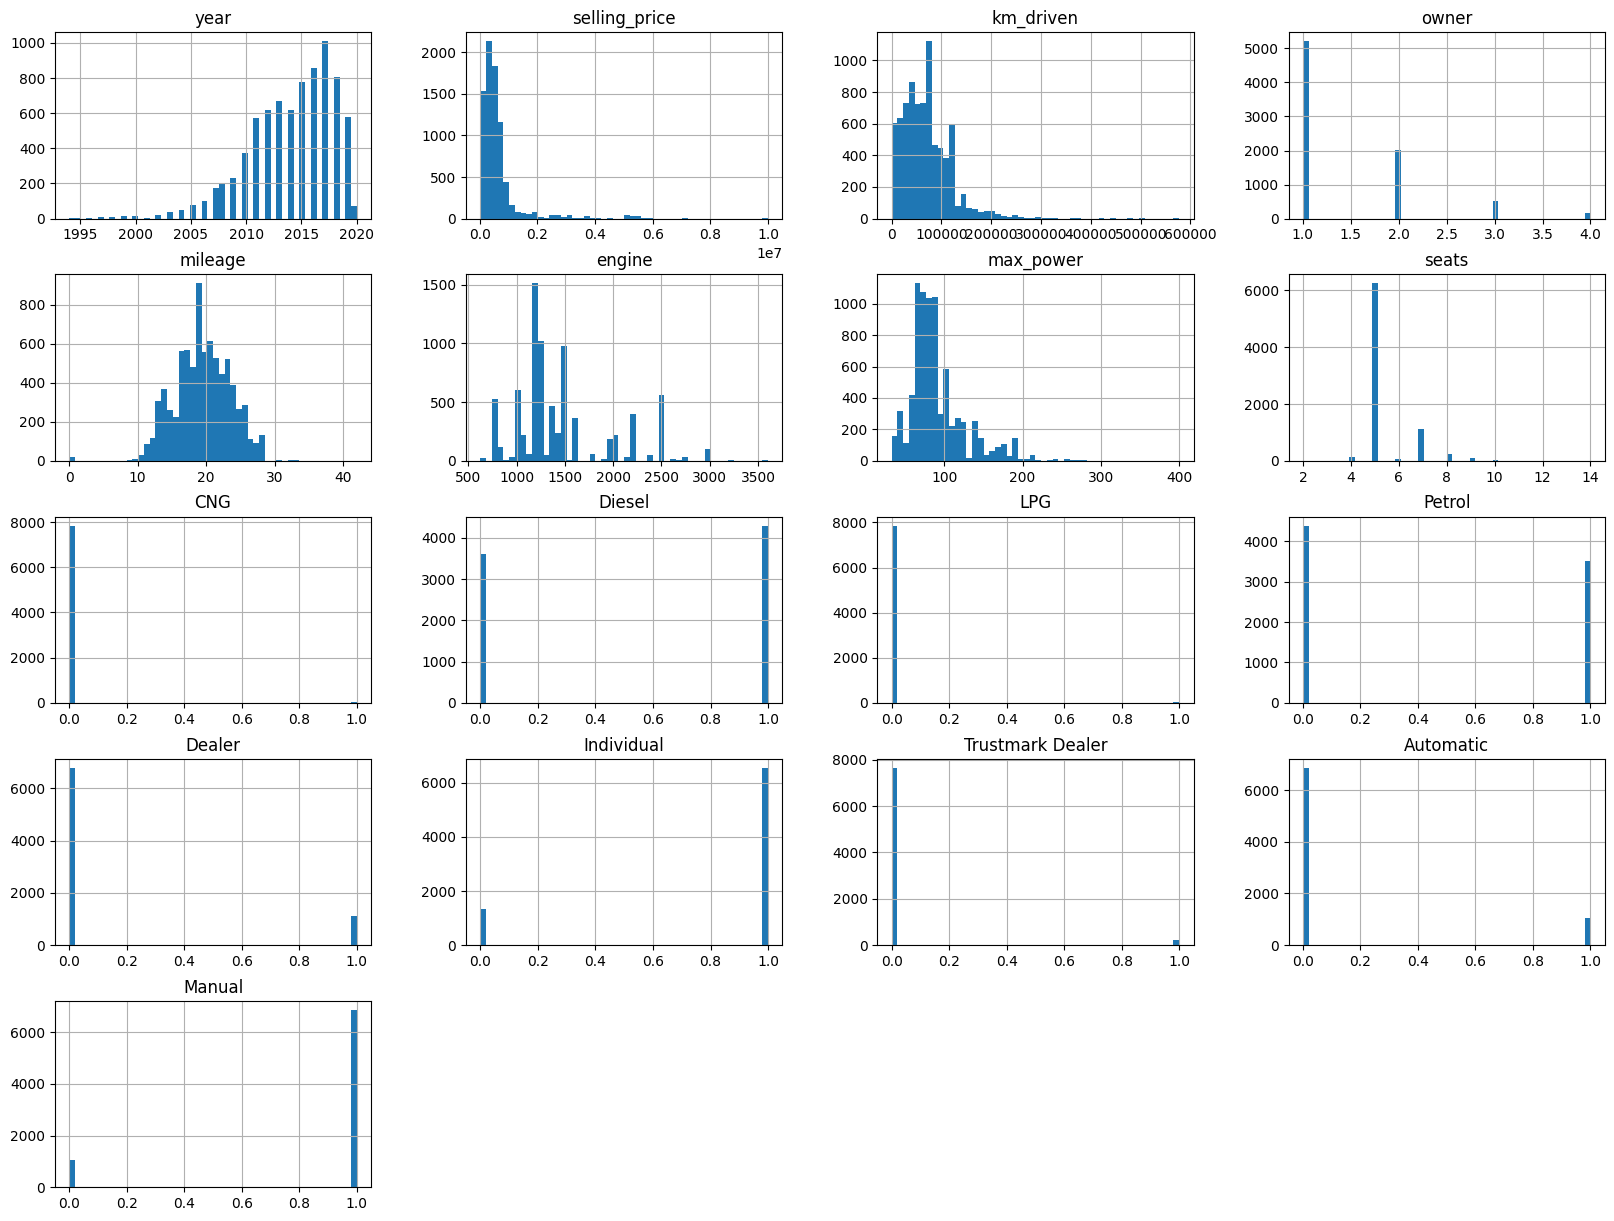

In [565]:
#plotting density plot to visualize the distribution of features

df.hist(bins = 50  , figsize = (20 , 15))
plt.show()

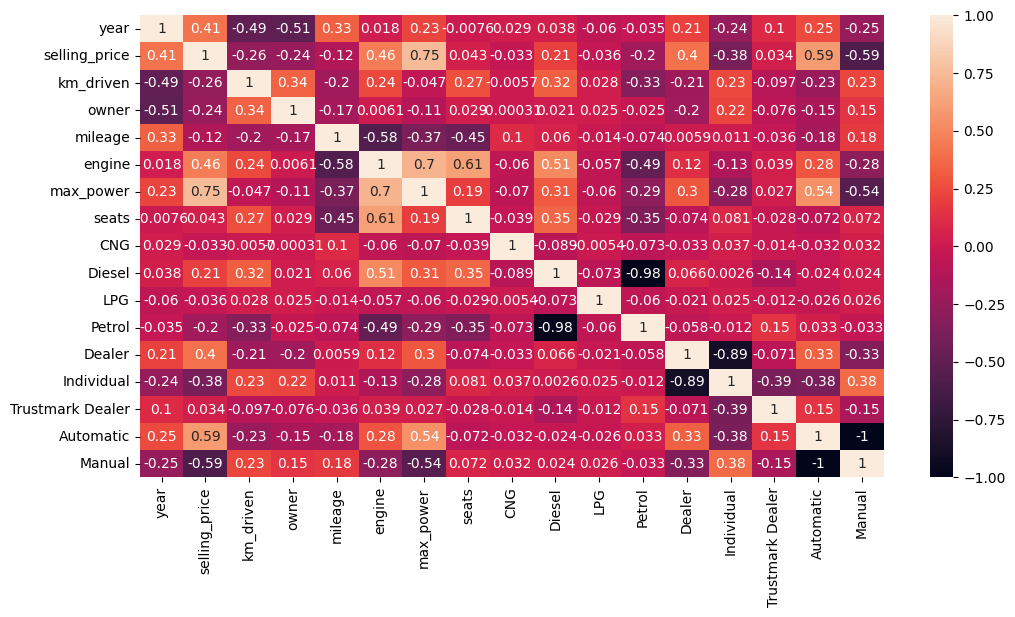

In [566]:
#check for multi colinearity
plt.figure(figsize = (12,6))
sns.heatmap(df.corr() , annot = True)
plt.show()

In [567]:
#finding the correlation between selling price and other features

cor = df1.corr()['selling_price']
cor

year                0.412573
selling_price       1.000000
km_driven          -0.260756
owner              -0.235138
mileage            -0.124741
engine              0.458135
max_power           0.750477
seats               0.043324
CNG                -0.033269
Diesel              0.209833
LPG                -0.036118
Petrol             -0.200055
Dealer              0.398996
Individual         -0.383805
Trustmark Dealer    0.033594
Automatic           0.589489
Manual             -0.589489
Name: selling_price, dtype: float64

In [568]:
#filtering out features which are not correlated to the dependent variable .
#here we are selecting the features whose correlation is between the range of 0.23 & -0.23 for model building 

features = []
for i in df1.columns:
    if (i == "selling_price"):
        continue
    if(cor.loc[i]> 0.23 or cor.loc[i]<-0.23):
        features.append(i)

print(features)

['year', 'km_driven', 'owner', 'engine', 'max_power', 'Dealer', 'Individual', 'Automatic', 'Manual']


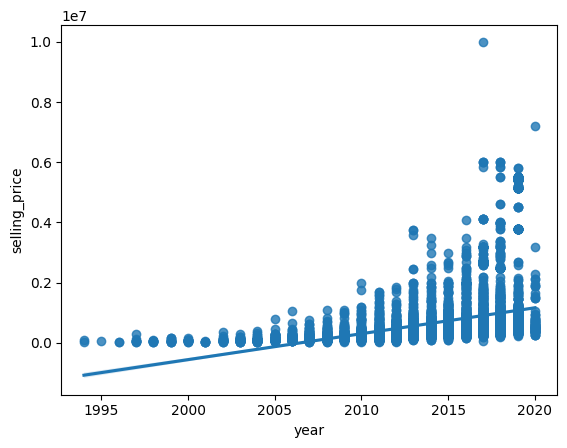

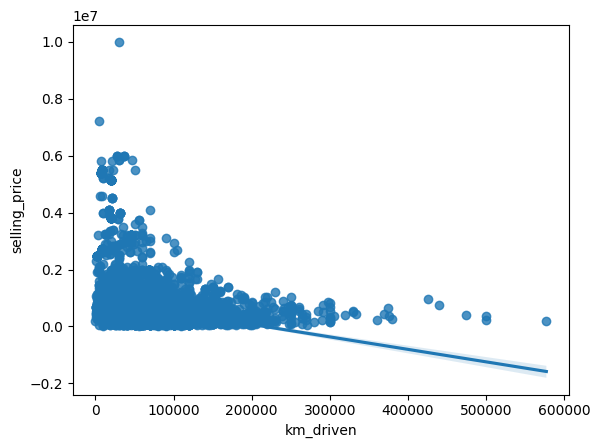

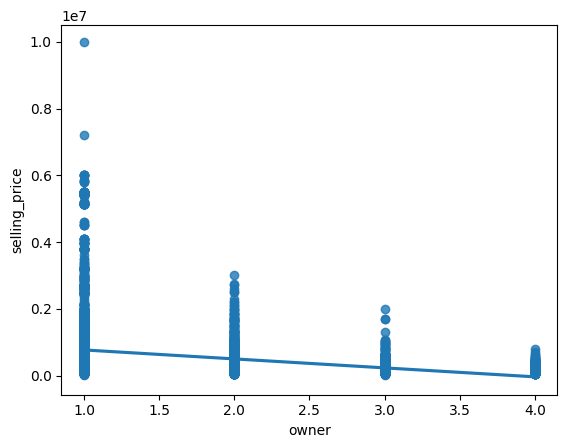

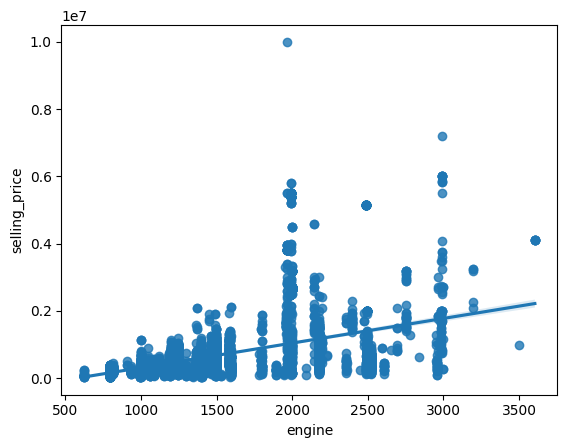

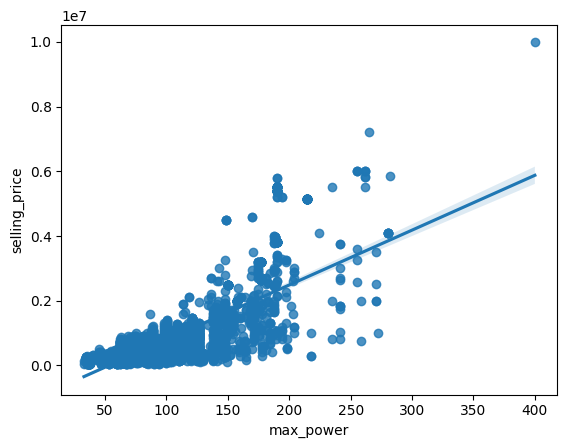

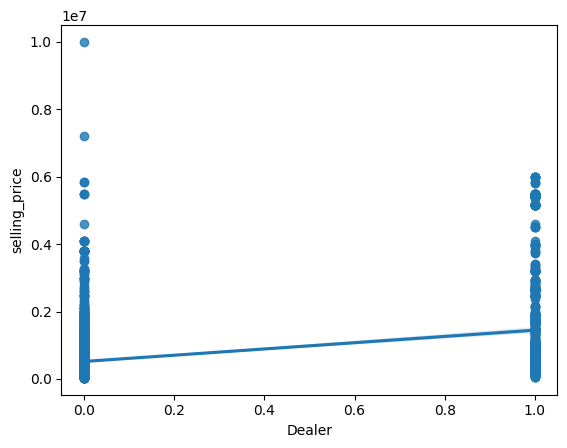

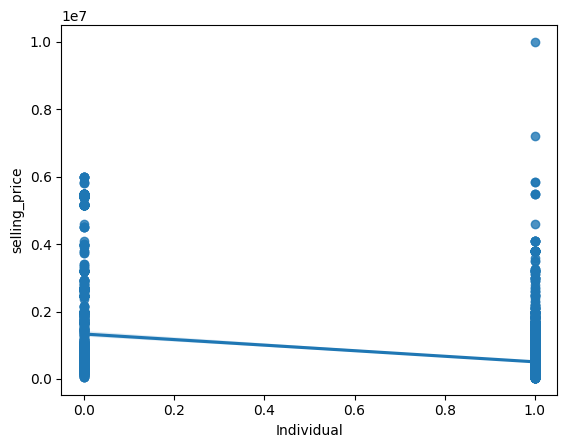

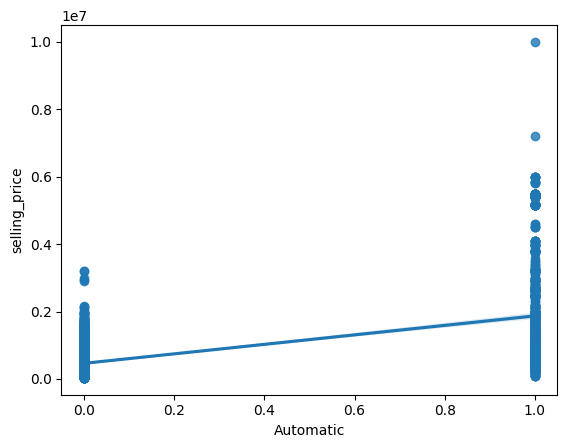

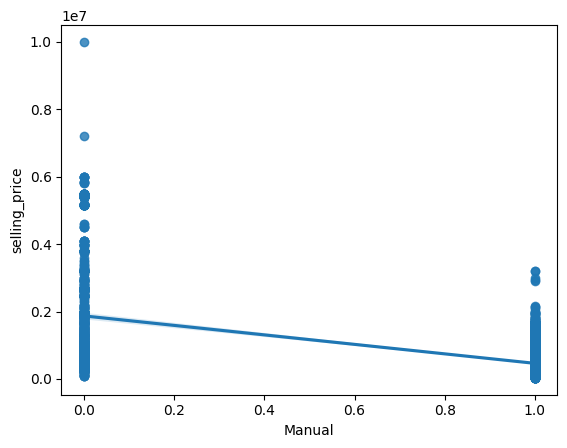

In [569]:
#checking for all the distribution of data wrt selling price
i = 1
for feature in features:
    f = plt.figure(i)
    sns.regplot( x = feature , y = 'selling_price' , data = df1)
    f.show()
    i+= 1

                                                        LINEAR REGRESSION

In [570]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.preprocessing import PolynomialFeatures

#to ensure proper workflow we will try to use data
from sklearn.pipeline import Pipeline


x = df1[features].astype('float')
x_train , x_test , y_train , y_test = train_test_split( x , df['selling_price'] , test_size = 0.25 , random_state = 42)

input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=True)), ('model', LinearRegression())]
pipe =Pipeline(input)
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [577]:
#we are predicting the y_train value using x_train value to check how well my model fits the training data
#further we will predict how well it performs on new dataset using x_test values

y_train_pred =  pipe.predict(x_train)

print('r2 score :' , r2_score(y_train_pred , y_train))
print('mean_absolute_error' , mean_absolute_error(y_train_pred , y_train))

r2 score : 0.888151859605148
mean_absolute_error 148315.5077241412


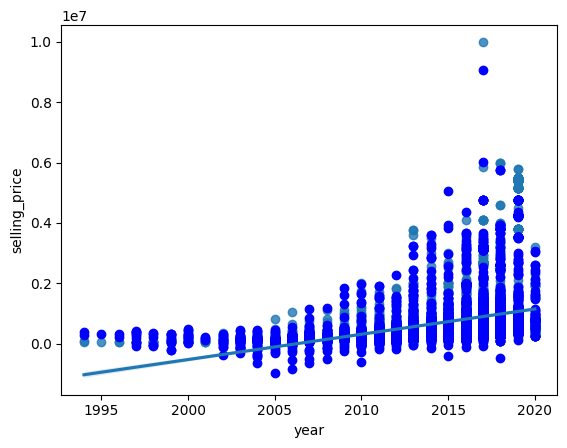

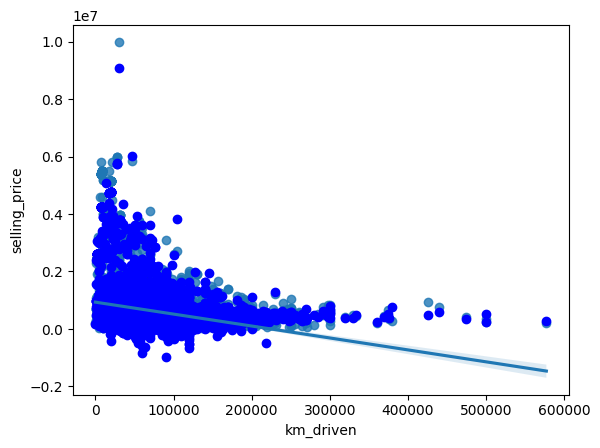

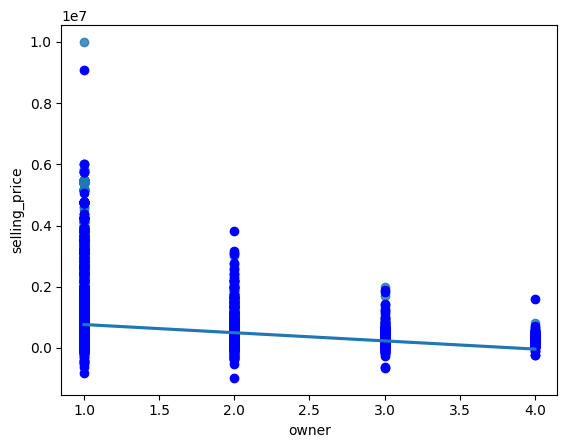

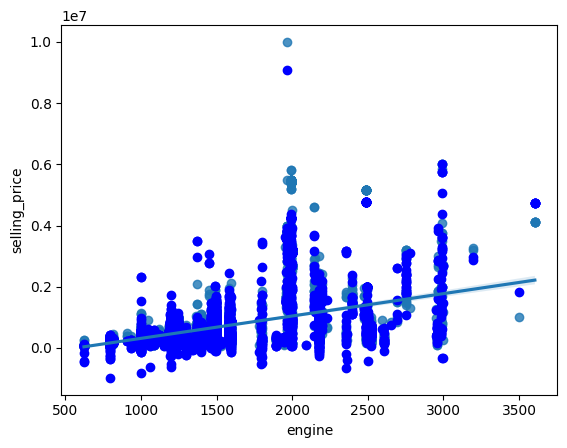

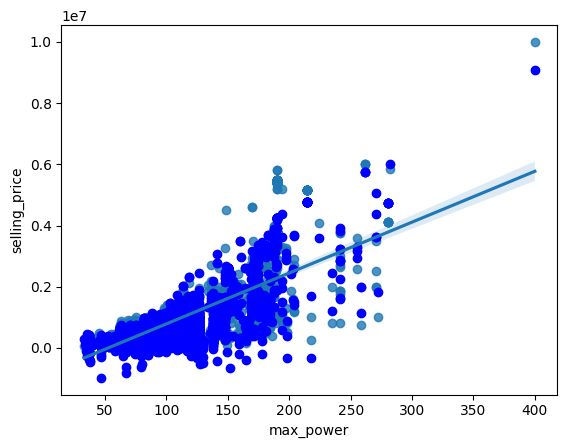

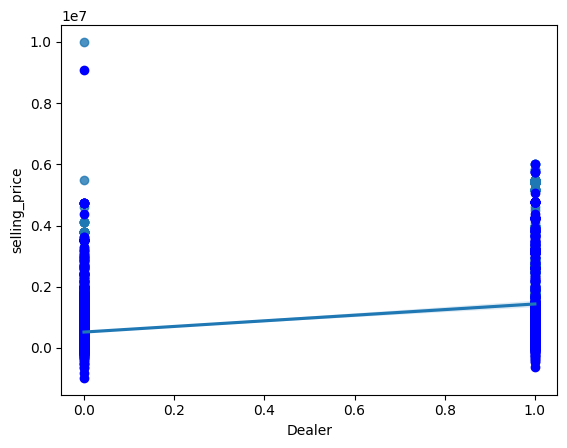

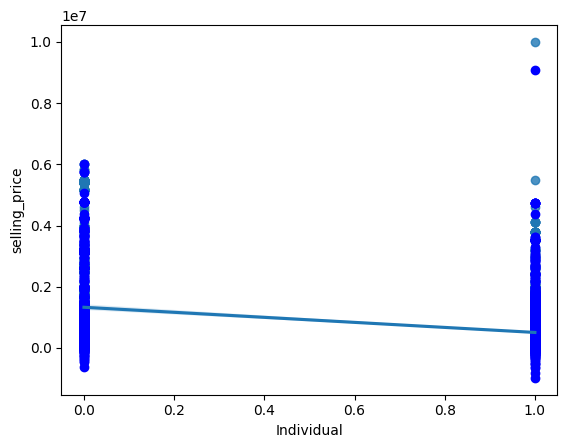

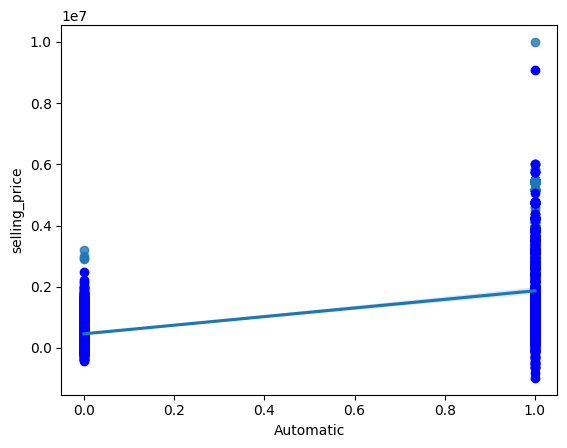

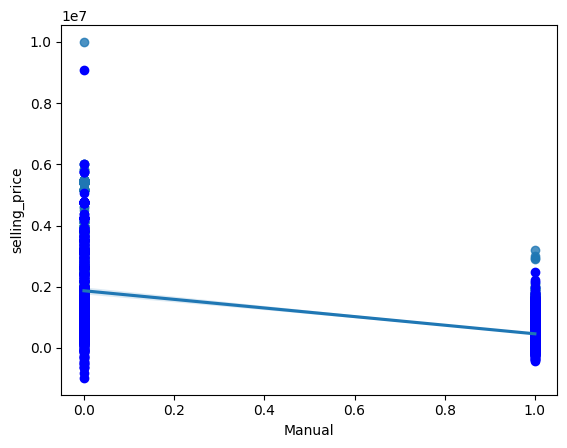

In [573]:
# regression  plot against features

import warnings
warnings.filterwarnings("ignore")
i = 1
df_train = pd.concat([x_train , y_train] , axis = 1)
df_train

for feature in features:
    f = plt.figure(i)
    
    sns.regplot(x=feature, y='selling_price', data=df_train)
    plt.scatter(df_train[feature], y_train_pred, color='b')
    
    f.show()
    i+=1 

In [574]:
y_pred=pipe.predict(x_test)

In [575]:
print("r2 score : " , r2_score(y_pred , y_test))
print("mean absolute error : " , mean_absolute_error(y_pred , y_test))

r2 score :  0.883175750990035
mean absolute error :  150868.02806566455


<Axes: xlabel='selling_price', ylabel='Density'>

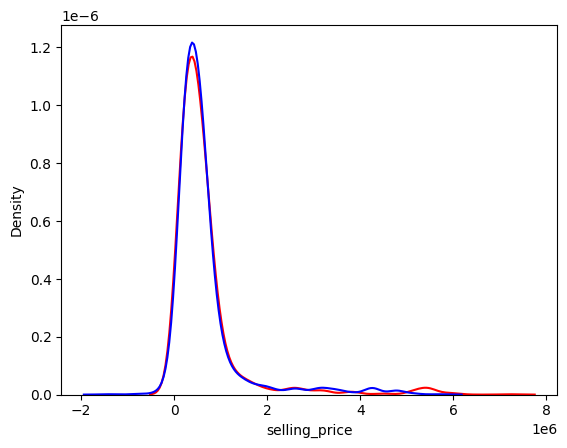

In [576]:
sns.distplot(y_test, hist=False, color='r')
sns.distplot(y_pred, hist=False, color='b')